In [78]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [65]:
# config
data_path = './data/datalab-cup3-reverse-image-caption-2021/dataset/text2ImgData.pkl'
dictionary_path = './data/datalab-cup3-reverse-image-caption-2021/dictionary/id2Word.npy'
images_dir = './data/datalab-cup3-reverse-image-caption-2021/102flowers/'
output_dir = './data/datalab-cup3-reverse-image-caption-2021/'

In [66]:
# show text2Img data
with open(data_path, 'rb') as f:
    data = pickle.load(f)

In [67]:
# show heads
data[:10]

,Captions,ImagePath
ID,,
6734,"[[9, 2, 17, 9, 1, 6, 14, 13, 18, 3, 41, 8, 11,...",./102flowers/image_06734.jpg
6736,"[[4, 1, 5, 12, 2, 3, 11, 31, 28, 68, 106, 132,...",./102flowers/image_06736.jpg
6737,"[[9, 2, 27, 4, 1, 6, 14, 7, 12, 19, 5427, 5427...",./102flowers/image_06737.jpg
6738,"[[9, 1, 5, 8, 54, 16, 38, 7, 12, 116, 325, 3, ...",./102flowers/image_06738.jpg
6739,"[[4, 12, 1, 5, 29, 11, 19, 7, 26, 70, 5427, 54...",./102flowers/image_06739.jpg
6741,"[[4, 1, 5, 158, 39, 157, 34, 14, 2, 7, 8, 11, ...",./102flowers/image_06741.jpg
6742,"[[4, 1, 15, 12, 3, 14, 13, 18, 7, 2, 10, 41, 3...",./102flowers/image_06742.jpg
6743,"[[9, 1, 5, 2, 10, 6, 78, 54, 37, 3, 166, 80, 5...",./102flowers/image_06743.jpg
6744,"[[14, 2, 7, 623, 3, 21, 235, 9, 19, 67, 6, 39,...",./102flowers/image_06744.jpg


In [68]:
# load dictionary
dictionary = np.load(dictionary_path)
dictionary[0:10]

array([['0', '<PAD>'],
       ['1', 'flower'],
       ['2', 'petals'],
       ['3', 'and'],
       ['4', 'this'],
       ['5', 'has'],
       ['6', 'are'],
       ['7', 'with'],
       ['8', 'a'],
       ['9', 'the']], dtype='<U21')

In [69]:
# decode caption
def decode(tokens):
    results = []
    for sentence in tokens:
        sentence_tokens = []
        for token_id in sentence:
            if dictionary[int(token_id)][1]!='<PAD>':
                sentence_tokens.append(dictionary[int(token_id)][1])
        results.append(' '.join(sentence_tokens) + '.')

    return results

In [70]:
decoded = []
captions_encoded = data['Captions']

for caption in captions_encoded:
    decoded.append(decode(caption))

data['Captions'] = decoded
# show first data
data[0:10]

,Captions,ImagePath
ID,,
6734,[the petals of the flower are pink in color an...,./102flowers/image_06734.jpg
6736,[this flower has white petals and yellow pisti...,./102flowers/image_06736.jpg
6737,[the petals on this flower are pink with white...,./102flowers/image_06737.jpg
6738,[the flower has a smooth purple petal with whi...,./102flowers/image_06738.jpg
6739,[this white flower has bright yellow stamen wi...,./102flowers/image_06739.jpg
6741,[this flower has four very broad light pink pe...,./102flowers/image_06741.jpg
6742,[this flower is white and pink in color with p...,./102flowers/image_06742.jpg
6743,[the flower has petals that are soft smooth th...,./102flowers/image_06743.jpg
6744,[pink petals with veining and green toward the...,./102flowers/image_06744.jpg


In [81]:
def convertImagePath(original):
    dir_names = original.split('/')
    return images_dir + dir_names[-1]

In [82]:
# create sentence-image pair
captions = []
images = []

for index, row in data.iterrows():
    captions = captions + row['Captions']
    images = images + [convertImagePath(row['ImagePath'])] * len(row['Captions'])

the petals of the flower are pink in color and have a yellow center.


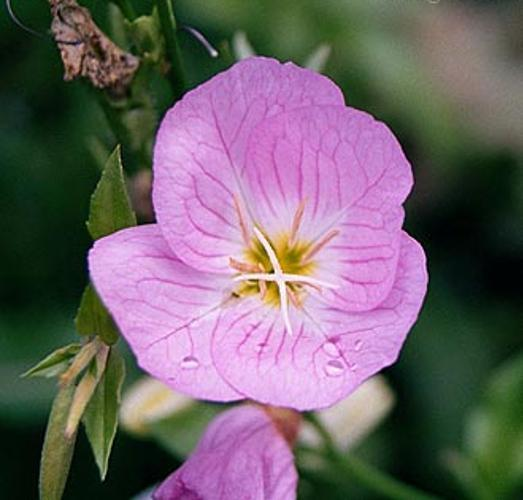

In [83]:
# show example
from IPython.display import Image
print(captions[0])
Image(images[0])

In [84]:
# split dataset
train_captions, captions, train_images, images = train_test_split(captions, images, random_state=42, test_size=0.2)
valid_captions, test_captions, valid_images, test_images = train_test_split(captions, images, random_state=42, test_size=0.5)

In [85]:
# save dataset
with open(output_dir+'train.src', mode='w') as f:
    f.write('\n'.join(train_images))

with open(output_dir+'train.dst', mode='w') as f:
    f.write('\n'.join(train_captions))

with open(output_dir+'valid.src', mode='w') as f:
    f.write('\n'.join(valid_images))

with open(output_dir+'valid.dst', mode='w') as f:
    f.write('\n'.join(valid_captions))

with open(output_dir+'test.src', mode='w') as f:
    f.write('\n'.join(test_images))

with open(output_dir+'test.dst', mode='w') as f:
    f.write('\n'.join(test_captions))